<a href="https://colab.research.google.com/github/manju2021/cxr_images/blob/master/Covid19_detection_using_X_ray_images_exp9_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense
from tensorflow.keras.optimizers import Adam
  from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Code for mounting the google drive
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/cxr_v1')

Clone & Explore dataset

In [ ]:
#clone the dataset from the github repository
#! git clone https://github.com/education454/datasets.git

In [ ]:
#set the path to the main dir
import os
main_dir="/content/drive/MyDrive/Colab Notebooks/cxr_v1/datasets/Data" 
#set the path to the train dir
train_dir=os.path.join(main_dir,'train')
#set the path to the test dir
test_dir=os.path.join(main_dir,'test')

#directory with the training covid images
train_covid_dir=os.path.join(train_dir,"COVID19")
#directory with the training normal images
train_normal_dir=os.path.join(train_dir,"NORMAL")
#directory with the testing covid images
test_covid_dir=os.path.join(test_dir,"COVID19")
#directory with the testing normal images
test_normal_dir=os.path.join(test_dir,"NORMAL")

#train_covid_syn_dir='/content/drive/MyDrive/Colab Notebooks/cxr1_exp2_v3/1000_epoch'

In [ ]:
#print the filenames
train_covid_names=os.listdir(train_covid_dir)
print(train_covid_names[1:10])
train_normal_names=os.listdir(train_normal_dir)
print(train_normal_names[1:10])
test_covid_names=os.listdir(test_covid_dir)
print(test_covid_names[1:10])
test_normal_names=os.listdir(test_normal_dir)
print(test_normal_names[1:10])


['aug_exp9_v3_gen_img_999_1.png', 'aug_exp9_v3_gen_img_999_2.png', 'aug_exp9_v3_gen_img_999_3.png', 'aug_exp9_v3_gen_img_999_4.png', 'aug_exp9_v3_gen_img_999_5.png', 'aug_exp9_v3_gen_img_999_6.png', 'aug_exp9_v3_gen_img_999_7.png', 'aug_exp9_v3_gen_img_999_8.png', 'aug_exp9_v3_gen_img_999_9.png']
['NORMAL(1303).jpg', 'NORMAL(1304).jpg', 'NORMAL(1305).jpg', 'NORMAL(1306).jpg', 'NORMAL(1307).jpg', 'NORMAL(1308).jpg', 'NORMAL(1309).jpg', 'NORMAL(131).jpg', 'NORMAL(1310).jpg']
['COVID-19 (353).jpg', 'COVID-19 (371).jpg', 'COVID-19 (425).jpg', 'COVID-19 (439).jpg', 'COVID-19 (457).jpg', 'COVID-19 (461).jpg', 'COVID-19 (475).jpg', 'COVID-19 (479).jpg', 'COVID-19 (485).jpg']
['NORMAL(1001).jpg', 'NORMAL(1003).jpg', 'NORMAL(1004).jpg', 'NORMAL(1011).jpg', 'NORMAL(1012).jpg', 'NORMAL(1015).jpg', 'NORMAL(1017).jpg', 'NORMAL(1020).jpg', 'NORMAL(1022).jpg']


In [ ]:
#print the total no of images present in each dir
print("Total covid images present in the training set :",len(train_covid_names))
print("Total covid images present in the test set :",len(test_covid_names))
print("Total normal images present in the training set :",len(train_normal_names))
print("Total normal images present in the test set :",len(test_normal_names))

Total covid images present in the training set : 1000
Total covid images present in the test set : 167
Total normal images present in the training set : 1266
Total normal images present in the test set : 317


Data Visualization

['/content/drive/MyDrive/Colab Notebooks/cxr_v1/datasets/Data/train/COVID19/aug_exp9_v3_gen_img_999_0.png', '/content/drive/MyDrive/Colab Notebooks/cxr_v1/datasets/Data/train/COVID19/aug_exp9_v3_gen_img_999_1.png', '/content/drive/MyDrive/Colab Notebooks/cxr_v1/datasets/Data/train/COVID19/aug_exp9_v3_gen_img_999_2.png', '/content/drive/MyDrive/Colab Notebooks/cxr_v1/datasets/Data/train/COVID19/aug_exp9_v3_gen_img_999_3.png', '/content/drive/MyDrive/Colab Notebooks/cxr_v1/datasets/Data/train/COVID19/aug_exp9_v3_gen_img_999_4.png', '/content/drive/MyDrive/Colab Notebooks/cxr_v1/datasets/Data/train/COVID19/aug_exp9_v3_gen_img_999_5.png', '/content/drive/MyDrive/Colab Notebooks/cxr_v1/datasets/Data/train/COVID19/aug_exp9_v3_gen_img_999_6.png', '/content/drive/MyDrive/Colab Notebooks/cxr_v1/datasets/Data/train/COVID19/aug_exp9_v3_gen_img_999_7.png']
['/content/drive/MyDrive/Colab Notebooks/cxr_v1/datasets/Data/train/NORMAL/NORMAL(1302).jpg', '/content/drive/MyDrive/Colab Notebooks/cxr_v1/da

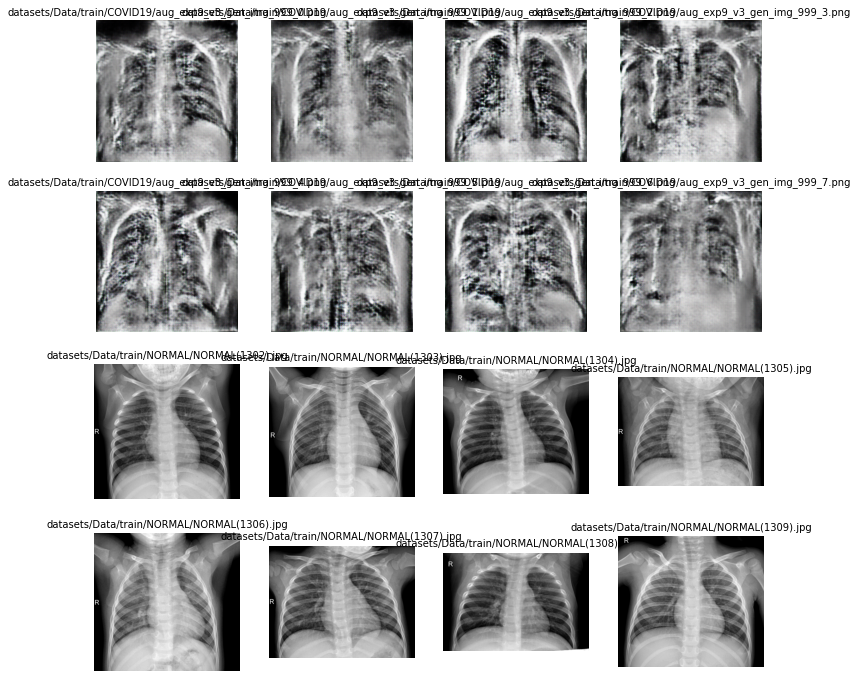

In [ ]:
# plot a grid of 16 images (8 images of Covid19 and 8 images of Normal)
import matplotlib.image as mpimg
#set the number of columns and rows
rows=4
cols=4
#set the figure size
fig=plt.gcf()
fig.set_size_inches(12,12)
#get the filenames from the covid & normal dir of the train dataset
covid_pic=[os.path.join(train_covid_dir,filename) for filename in train_covid_names[0:8]]
normal_pic=[os.path.join(train_normal_dir,filename) for filename in train_normal_names[0:8]]
#print the list
print(covid_pic)
print(normal_pic)
#merge the covid and normal list
merged_list=covid_pic+normal_pic
for i,img_path in enumerate(merged_list):
  data=img_path.split('/',6)[6]
  sp=plt.subplot(rows,cols,i+1)
  sp.axis('Off')
  img=mpimg.imread(img_path)
  sp.set_title(data,fontsize=10)
  plt.imshow(img,cmap='gray')

plt.show()



Data Preprocessing & Augmentation

In [ ]:
# generate training,testing and validation batches 
dgen_train=ImageDataGenerator(rescale=1./255,
                              validation_split=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              )

dgen_validation=ImageDataGenerator(rescale=1./255)
dgen_test=ImageDataGenerator(rescale=1./255)

train_generator=dgen_train.flow_from_directory(train_dir,
                                               target_size=(150,150),
                                               subset='training',
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=True)


validation_generator=dgen_train.flow_from_directory(train_dir,
                                               target_size=(150,150),
                                               subset='validation',
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=True)


test_generator=dgen_test.flow_from_directory(test_dir,
                                               target_size=(150,150),
                                               #subset='validation',
                                               batch_size=32,
                                               class_mode='binary',
                                                shuffle=True)

Found 1813 images belonging to 2 classes.
Found 453 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [ ]:
#get the class indices
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [ ]:
#get the image shape
train_generator.image_shape

(150, 150, 3)

Build Convolutional Neural Network Model

In [ ]:
model=Sequential()
# add the convolutional layer
# filters, size of filters,padding,activation_function,input_shape
model.add(Conv2D(32,(5,5),padding='SAME',activation='relu',input_shape=(150,150,3)))
# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# place a dropout layer
model.add(Dropout(0.5))
# add another convolutional layer
model.add(Conv2D(64,(5,5),padding='SAME',activation='relu'))
# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# place a dropout layer
model.add(Dropout(0.5))
# Flatten layer
model.add(Flatten())
# add a dense layer : amount of nodes, activation
model.add(Dense(256,activation='relu'))
# place a dropout layer
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()
# 0.5 drop out rate is recommended, half input nodes will be dropped at each update



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 64)        0

Compile & Train the Model

In [ ]:
#compile the model
model.compile(Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy','Precision','Recall','TrueNegatives','TruePositives','FalseNegatives','FalsePositives'])

In [ ]:
#train the model
history=model.fit(train_generator,
                  epochs=30,
                  validation_data=validation_generator)

Epoch 1/30
57/57 [==============================] - 247s 4s/step - loss: 0.8444 - accuracy: 0.7457 - precision: 0.7717 - recall: 0.7739 - true_negatives: 568.0000 - true_positives: 784.0000 - false_negatives: 229.0000 - false_positives: 232.0000 - val_loss: 0.3088 - val_accuracy: 0.8808 - val_precision: 0.8373 - val_recall: 0.9763 - val_true_negatives: 152.0000 - val_true_positives: 247.0000 - val_false_negatives: 6.0000 - val_false_positives: 48.0000
Epoch 2/30
57/57 [==============================] - 37s 650ms/step - loss: 0.0932 - accuracy: 0.9664 - precision: 0.9750 - recall: 0.9645 - true_negatives: 775.0000 - true_positives: 977.0000 - false_negatives: 36.0000 - false_positives: 25.0000 - val_loss: 0.0245 - val_accuracy: 0.9912 - val_precision: 0.9844 - val_recall: 1.0000 - val_true_negatives: 196.0000 - val_true_positives: 253.0000 - val_false_negatives: 0.0000e+00 - val_false_positives: 4.0000
Epoch 3/30
57/57 [==============================] - 37s 649ms/step - loss: 0.0155 - a

Performance Evaluation

In [ ]:
#get the keys of history object
history.history.keys()

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'true_negatives', 'true_positives', 'false_negatives', 'false_positives', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'val_true_negatives', 'val_true_positives', 'val_false_negatives', 'val_false_positives'])

Text(0.5, 0, 'epoch')

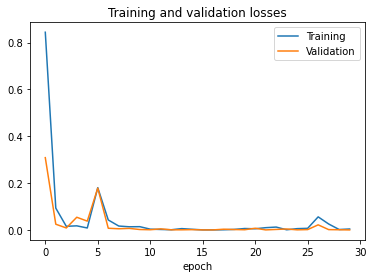

In [ ]:
#plot graph between training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Validation'])
plt.title('Training and validation losses')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

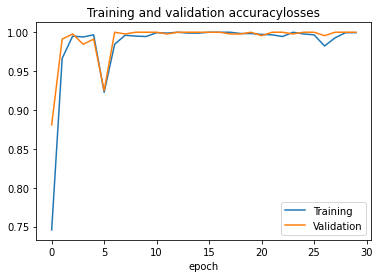

In [ ]:
#plot graph between training and validation accuarcy
#plot graph between training and validation loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training','Validation'])
plt.title('Training and validation accuracylosses')
plt.xlabel('epoch')

In [ ]:
# get the test acuarcy and loss
print(model.evaluate(test_generator))
#print('test loss :{} test acc : {}'.format(test_loss,test_acc))

16/16 [==============================] - 92s 6s/step - loss: 3.5254 - accuracy: 0.6942 - precision: 0.6817 - recall: 1.0000 - true_negatives: 19.0000 - true_positives: 317.0000 - false_negatives: 0.0000e+00 - false_positives: 148.0000
[3.5253543853759766, 0.6942148804664612, 0.6817204356193542, 1.0, 19.0, 317.0, 0.0, 148.0]


Prediction On New Data

In [ ]:
from google.colab import files
from keras.preprocessing import image
os.chdir('/content/drive/MyDrive/Colab Notebooks/testing/')
uploaded=files.upload()

for filename in uploaded.keys():
  img_path='/content/drive/MyDrive/Colab Notebooks/testing/'+filename  
  img=image.load_img(img_path,target_size=(150,150))
  images=image.img_to_array(img)
  images=np.expand_dims(images,axis=0)
  prediction=model.predict(images)
  print(filename)

  if prediction==0:
    print('covid detected')
  else:
    print('Your report is nomal')

    


Saving Normal-2.png to Normal-2 (1).png
Saving Normal-5.png to Normal-5.png
Normal-2.png
Your report is nomal
Normal-5.png
covid detected
